In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!git clone https://github.com/FinanceData/marcap.git marcap

Cloning into 'marcap'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 268 (delta 7), reused 0 (delta 0), pack-reused 252
Receiving objects: 100% (268/268), 1.47 GiB | 42.59 MiB/s, done.
Resolving deltas: 100% (89/89), done.
Checking out files: 100% (33/33), done.


In [3]:
from marcap.marcap_utils import marcap_data

# filtering 'Samsung' stock
train_samsung = marcap_data('2000-01-01', '2018-12-31', code = '005930')
test_samsung = marcap_data('2019-01-01', '2020-12-31', code = '005930')

In [4]:
# check train_samsung dataset
train_samsung

,Code,Name,Close,Changes,ChagesRatio,Volume,Amount,Open,High,Low,Marcap,MarcapRatio,Stocks,ForeignShares,ForeignRatio,Rank
Date,,,,,,,,,,,,,,,,
2000-01-04,005930,삼성전자,305500.0,39500.0,14.8,1483967.0,4.442332e+11,300000.0,305500.0,283000.0,4.577575e+13,47.64,1.498388e+08,7.085643e+07,47.29,2.0
2000-01-05,005930,삼성전자,279000.0,-26500.0,-8.7,1493604.0,4.337834e+11,290000.0,303000.0,276000.0,4.180502e+13,45.04,1.498388e+08,7.090849e+07,47.32,2.0
2000-01-06,005930,삼성전자,281000.0,2000.0,0.7,1087810.0,3.080053e+11,287500.0,289000.0,279000.0,4.210470e+13,47.73,1.498388e+08,7.144177e+07,47.68,2.0
2000-01-07,005930,삼성전자,277000.0,-4000.0,-1.4,806195.0,2.227178e+11,278000.0,283500.0,268000.0,4.150534e+13,51.13,1.498388e+08,7.148318e+07,47.71,2.0
2000-01-10,005930,삼성전자,288500.0,11500.0,4.2,937615.0,2.657545e+11,280000.0,288500.0,279000.0,4.322849e+13,55.11,1.498388e+08,7.169233e+07,47.85,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,005930,삼성전자,38650.0,0.0,0.0,14947080.0,5.751887e+11,38200.0,38650.0,38100.0,2.307321e+14,14.51,5.969783e+09,3.316542e+09,55.56,1.0
2018-12-24,005930,삼성전자,38800.0,150.0,0.4,9729530.0,3.760070e+11,38500.0,39050.0,38300.0,2.316276e+14,14.61,5.969783e+09,3.317382e+09,55.57,1.0
2018-12-26,005930,삼성전자,38350.0,-450.0,-1.2,12707675.0,4.885464e+11,38400.0,38750.0,38300.0,2.289412e+14,14.60,5.969783e+09,3.313841e+09,55.51,1.0


In [5]:
# check test_samsung dataset
test_samsung

,Code,Name,Close,Changes,ChagesRatio,Volume,Amount,Open,High,Low,Marcap,MarcapRatio,Stocks,ForeignShares,ForeignRatio,Rank
Date,,,,,,,,,,,,,,,,
2019-01-02,005930,삼성전자,38750.0,50.0,0.1,7847664.0,3.046826e+11,39400.0,39400.0,38550.0,2.313291e+14,14.87,5.969783e+09,3.319573e+09,55.61,1.0
2019-01-03,005930,삼성전자,37600.0,-1150.0,-3.0,12471493.0,4.729665e+11,38300.0,38550.0,37450.0,2.244638e+14,14.57,5.969783e+09,3.321406e+09,55.64,1.0
2019-01-04,005930,삼성전자,37450.0,-150.0,-0.4,14108958.0,5.254030e+11,37450.0,37600.0,36850.0,2.235684e+14,14.38,5.969783e+09,3.322735e+09,55.66,1.0
2019-01-07,005930,삼성전자,38750.0,1300.0,3.5,12748997.0,4.908332e+11,38000.0,38900.0,37800.0,2.313291e+14,14.68,5.969783e+09,3.324332e+09,55.69,1.0
2019-01-08,005930,삼성전자,38100.0,-650.0,-1.7,12756554.0,4.915783e+11,38000.0,39200.0,37950.0,2.274487e+14,14.52,5.969783e+09,3.323036e+09,55.66,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-08,005930,삼성전자,59700.0,-200.0,-0.3,24589924.0,1.473634e+12,60500.0,60700.0,59500.0,3.563960e+14,18.07,5.969783e+09,3.344480e+09,56.02,1.0
2020-10-12,005930,삼성전자,60400.0,700.0,1.2,16145837.0,9.722493e+11,60000.0,60400.0,59900.0,3.605749e+14,18.20,5.969783e+09,3.347613e+09,56.08,1.0
2020-10-13,005930,삼성전자,60900.0,500.0,0.8,19247631.0,1.171363e+12,61000.0,61400.0,60400.0,3.635598e+14,18.35,5.969783e+09,3.349586e+09,56.11,1.0


In [6]:
# data normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scale_cols = ['Open', 'Close', 'Low', 'High', 'Volume']
scaled_train_samsung = scaler.fit_transform(train_samsung[scale_cols])
scaled_test_samsung = scaler.fit_transform(test_samsung[scale_cols])

scaled_train_samsung = pd.DataFrame(scaled_train_samsung)
scaled_test_samsung = pd.DataFrame(scaled_test_samsung)

scaled_train_samsung.columns = scale_cols
scaled_test_samsung.columns = scale_cols

In [7]:
# check scaled train dataset
scaled_train_samsung

,Open,Close,Low,High,Volume
0,0.092287,0.094677,0.087467,0.094049,0.022357
1,0.088762,0.085289,0.084967,0.093168,0.022509
2,0.087881,0.085998,0.086039,0.088234,0.016111
3,0.084532,0.084581,0.082110,0.086295,0.011671
4,0.085237,0.088655,0.086039,0.088058,0.013743
...,...,...,...,...,...
4682,0.000000,0.000142,0.000000,0.000000,0.234625
4683,0.000106,0.000195,0.000071,0.000141,0.152361
4684,0.000071,0.000035,0.000071,0.000035,0.199317
4685,0.000176,0.000000,0.000000,0.000053,0.164677


In [8]:
# check scaled train dataset
scaled_test_samsung

,Open,Close,Low,High,Volume
0,0.079430,0.052104,0.068410,0.071429,0.062502
1,0.034623,0.006012,0.024145,0.037698,0.146485
2,0.000000,0.000000,0.000000,0.000000,0.176227
3,0.022403,0.052104,0.038229,0.051587,0.151526
4,0.022403,0.026052,0.044266,0.063492,0.151663
...,...,...,...,...,...
435,0.938900,0.891784,0.911469,0.916667,0.366595
436,0.918534,0.919840,0.927565,0.904762,0.213223
437,0.959267,0.939880,0.947686,0.944444,0.269562
438,0.959267,0.939880,0.951710,0.932540,0.212149


In [9]:
# make dataset
# find next 'end' data 
def make_dataset(data, label, window_size = 10):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i + window_size]))
        label_list.append(np.array(label.iloc[i + window_size]))
    return np.array(feature_list), np.array(label_list)

In [10]:
train_feature = scaled_train_samsung[['Open', 'High', 'Low', 'Volume']]
train_label = scaled_train_samsung[['Close']]
test_feature = scaled_test_samsung[['Open', 'High', 'Low', 'Volume']]
test_label = scaled_test_samsung[['Close']]

# train dataset
train_feature, train_label = make_dataset(train_feature, train_label, 10)

In [11]:
from sklearn.model_selection import train_test_split

# build train, validation set
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size = 0.2)

x_train.shape, x_valid.shape

((3741, 10, 4), (936, 10, 4))

In [12]:
# test dataset
test_feature, test_label = make_dataset(test_feature, test_label, 10)

test_feature.shape, test_label.shape

((430, 10, 4), (430, 1))

In [13]:
# build model
from keras.models import *
from keras.layers import *
from keras.callbacks import EarlyStopping, ModelCheckpoint


def build_model():
    model = Sequential()
    
    model.add(LSTM(16, input_shape=(train_feature.shape[1], train_feature.shape[2]), return_sequences = False))
    model.add(Dense(1, activation = 'linear'))

    return model

model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 16)                1344      
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 1,361
Trainable params: 1,361
Non-trainable params: 0
_________________________________________________________________


In [14]:
# if val_loss will not imporve consecutive 10 times(patience = 10), epochs will be stopped
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 10)
mc = ModelCheckpoint('check.h5', monitor = 'val_acc', mode = 'max', verbose = 1, save_best_only=True)

In [15]:
model.compile(loss = 'mean_squared_error', optimizer = 'rmsprop', metrics = ['acc'])
history = model.fit(x_train, y_train, epochs = 200, batch_size = 8, validation_data = (x_valid, y_valid), callbacks = [es, mc])

Epoch 1/200
462/468 [============================>.] - ETA: 0s - loss: 6.3850e-04 - acc: 5.4113e-04
Epoch 00001: val_acc improved from -inf to 0.00000, saving model to check.h5
468/468 [==============================] - 3s 7ms/step - loss: 7.2724e-04 - acc: 5.3462e-04 - val_loss: 2.8629e-04 - val_acc: 0.0000e+00
Epoch 2/200
465/468 [============================>.] - ETA: 0s - loss: 4.9506e-04 - acc: 5.3763e-04
Epoch 00002: val_acc did not improve from 0.00000
468/468 [==============================] - 3s 6ms/step - loss: 4.9250e-04 - acc: 5.3462e-04 - val_loss: 2.6920e-04 - val_acc: 0.0000e+00
Epoch 3/200
464/468 [============================>.] - ETA: 0s - loss: 4.3802e-04 - acc: 5.3879e-04
Epoch 00003: val_acc did not improve from 0.00000
468/468 [==============================] - 3s 6ms/step - loss: 4.3912e-04 - acc: 5.3462e-04 - val_loss: 1.5163e-04 - val_acc: 0.0000e+00
Epoch 4/200
463/468 [============================>.] - ETA: 0s - loss: 4.1129e-04 - acc: 5.3996e-04
Epoch 00004:

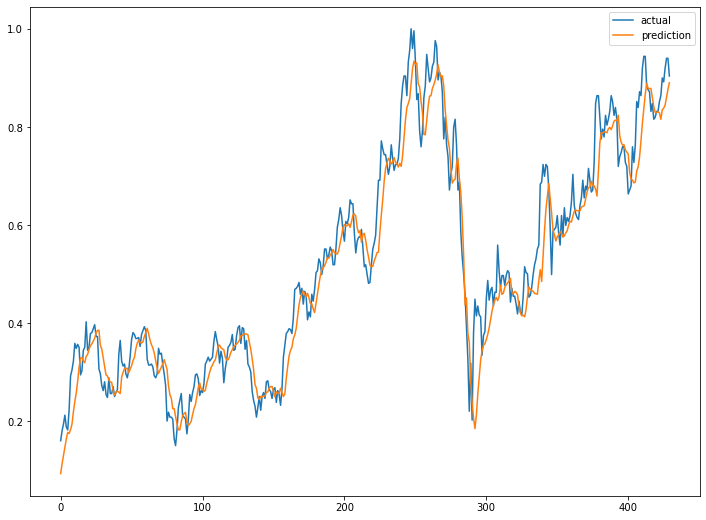

In [16]:
import matplotlib.pyplot as plt

# loading weight
model.load_weights('check.h5')

# prediction
pred = model.predict(test_feature)

plt.figure(figsize = (12, 9))
plt.plot(test_label, label = 'actual')
plt.plot(pred, label = 'prediction')
plt.legend()
plt.show()